### Settings & imports

In [1]:
%matplotlib notebook

In [2]:
import sys
mypath = "/home/basia/Documents/spectroscopy/wassersteinms"
sys.path.insert(0, mypath)
import masserstein 

In [3]:
import os

from masserstein import Spectrum, NMRSpectrum
from masserstein import estimate_proportions

from matplotlib import pyplot as plt

import numpy as np

import pulp

import pickle

import seaborn as sns
from textwrap import wrap

from pathlib import Path

import pandas as pd

In [4]:
nr_of_experiment = 9

### Experiments data

In [5]:
components_dictionary = {'experiment_2': ['Pinene', 'Benzyl benzoate'],
                        'experiment_3': ['Pinene', 'Limonene'],
                        'experiment_4': ['Benzyl benzoate', 'm Anisaldehyde'],
                        'experiment_5': ['Isopropyl myristate', 'Benzyl benzoate', 'Alpha pinene', 'Limonene'],
                        'experiment_1': ['Pinene', 'Benzyl benzoate'],
                        'experiment_8': ['Lactate', 'Alanine', 'Creatine', 'Creatinine', 'Choline chloride'],
                        'experiment_6': ['Lactate', 'Alanine', 'Creatine', 'Creatinine', 'Choline chloride'],
                        'experiment_7': ['Lactate', 'Alanine', 'Creatine', 'Creatinine', 'Choline chloride'],
                        'experiment_9': ['Benzyl benzoate', 'm Anisaldehyde']}

In [6]:
protons_dictionary = {'experiment_2': [16, 12],
                        'experiment_3': [16, 16],
                        'experiment_4': [12, 8],
                        'experiment_5': [34, 12, 16, 16],
                        'experiment_1': [16, 12],
                        'experiment_8': [4, 4, 5, 5, 13],
                        'experiment_6': [4, 4, 5, 5, 13],
                        'experiment_7': [4, 4, 5, 5, 13],
                        'experiment_9': [12, 8]}

In [7]:
ground_truth_molar_proportions = {'experiment_2': [0.09088457406472417, 0.9091154259352758],
                                    'experiment_3': [0.505, 0.495],
                                    'experiment_4': [0.8403875207510383, 0.1596124792489616],
                                    'experiment_5': [0.7264578344443725, 0.10578603326645526, 0.081968804608116, 0.08578732768105625],
                                    'experiment_1': [0.3865, 0.6135],
                                    'experiment_8': [0.3022, 0.2240, 0.1253, 0.2028, 0.1457],
                                    'experiment_6': [0.3022, 0.2240, 0.1253, 0.2028, 0.1457],
                                    'experiment_7': [0.3022, 0.2240, 0.1253, 0.2028, 0.1457],
                                    'experiment_9': [0.3702, 0.6298]}

In [8]:
experiments_folders = {'experiment_2': 'experiment_2_intensity_difference',
                        'experiment_1': 'experiment_1_miniperfumes',
                        'experiment_8': 'experiment_8_metabolites',
                         'experiment_4': 'experiment_4_overlapping_and_intensity_difference',
                         'experiment_6': 'experiment_6_and_7_shim',
                       'experiment_7': 'experiment_6_and_7_shim',
                        'experiment_9': 'experiment_9_different_solvents',
                        'experiment_5': 'experiment_5_perfumes_and_absent_components',
                         'experiment_3': 'experiment_3_overlapping'}

In [9]:
best_kappa_mix = [0.06, 0.09, 0.05, 0.23, 0.37, 0.05, 0.11, 0.03, 0.2]

In [10]:
best_kappa_model = [0.2, 0.08, 0.01, 0.02, 0.24, 0.02, 0.02, 0.09, 0.29]

### Loading the data

In [11]:
cwd = Path(os.getcwd())
path = cwd.parent.absolute()

In [12]:
if (nr_of_experiment != 6 and nr_of_experiment != 7):
    filename = str(path)+'/' + experiments_folders['experiment_' + str(nr_of_experiment)] + '/preprocessed_mix.csv'
    mix = np.loadtxt(filename, delimiter=',')
else:
    filename = str(path) + '/' + experiments_folders['experiment_' + str(nr_of_experiment)] + '/preprocessed_exp'+str(nr_of_experiment)+'_mix.csv'
    mix = np.loadtxt(filename, delimiter=',')

In [13]:
how_many_components = len(components_dictionary['experiment_'+str(nr_of_experiment)])
names = ['comp' + str(i) for i in range(how_many_components)]

In [14]:
spectra = []
for i in range(how_many_components):
    if (nr_of_experiment != 6 and nr_of_experiment != 7):
        filename = str(path) + '/' + experiments_folders['experiment_' + str(nr_of_experiment)] + \
                    '/preprocessed_comp' + str(i) + '.csv'
        spectra.append(np.loadtxt(filename, delimiter=','))
    else:
        filename = str(path) + '/' + experiments_folders['experiment_' + str(nr_of_experiment)] + \
                    '/preprocessed_exp'+str(nr_of_experiment)+ '_comp'+ str(i) + '.csv'
        spectra.append(np.loadtxt(filename, delimiter=','))

In [15]:
spectra2 = []
names = []
for i in range(len(spectra)):
    spectra2.append(NMRSpectrum(confs=list(zip(spectra[i][:,0], spectra[i][:,1])), 
                                protons=protons_dictionary['experiment_'+str(nr_of_experiment)][i]))
    names.append('comp'+str(i))

spectra = spectra2
del(spectra2)
mix = NMRSpectrum(confs=list(zip(mix[:,0], mix[:,1])))

In [16]:
for i, name in enumerate(names):
    globals()[name] = spectra[i]

In [17]:
# mix.plot(profile=True)
# comp0.plot(profile=True)
# comp1.plot(profile=True)

### Estimation

In [18]:
estimation_vis = estimate_proportions(mix, spectra,
                                        MTD=best_kappa_mix[nr_of_experiment-1], 
                                        MTD_th=best_kappa_model[nr_of_experiment-1],
                                        verbose=True, solver=pulp.GUROBI(msg=False), 
                                        what_to_compare='area')

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-10


Initial filtering of formulas: 100%|██████████████| 2/2 [00:00<00:00, 55.58it/s]


Removed theoretical spectra due to no matching experimental peaks: []
Envelope bounds: [(3.5000299999999998, 11.99995, 0), (3.5000299999999998, 11.99995, 1)]


Computing chunks: 100%|████████████████████████| 2/2 [00:00<00:00, 67650.06it/s]


Number of chunks: 1
ChunkIDs: [0, 0]
Chunk bounds: [(3.2100299999999997, 12.28995)]


Splitting the experimental spectrum into chunks: 139577it [00:00, 3198013.60it/s]


Ion currents in chunks: [0.9999999999999973]


Deconvolving chunks:   0%|                                | 0/1 [00:00<?, ?it/s]

Deconvolving chunk 0


/home/basia/.local/lib/python3.10/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
Deconvolving chunks: 100%|███████████████████████| 1/1 [03:16<00:00, 196.28s/it]

Chunk %i deconvolution status: Optimal
Signal proportion in experimental spectrum: 0.9298597180920001
Noise proportion in experimental spectrum: 0.07014029297699982
Total explanation: 1.000000011069
Noise proportion in combination of theoretical spectra: 0.008558474193


In [19]:
estimation_vis['proportions']

[0.43970247519399885, 0.49015724289799867]

In [20]:
estimation_vis['proportion_of_noise_in_theoretical']

0.008558474192999977

In [21]:
estimation_molar = estimate_proportions(mix, spectra,
                                        MTD=best_kappa_mix[nr_of_experiment-1], 
                                        MTD_th=best_kappa_model[nr_of_experiment-1],
                                        verbose=True, solver=pulp.GUROBI(msg=False), 
                                        what_to_compare='concentration')

Initial filtering of formulas: 100%|██████████████| 2/2 [00:00<00:00, 58.66it/s]


Removed theoretical spectra due to no matching experimental peaks: []
Envelope bounds: [(3.5000299999999998, 11.99995, 0), (3.5000299999999998, 11.99995, 1)]


Computing chunks: 100%|████████████████████████| 2/2 [00:00<00:00, 55553.70it/s]


Number of chunks: 1
ChunkIDs: [0, 0]
Chunk bounds: [(3.2100299999999997, 12.28995)]


Splitting the experimental spectrum into chunks: 139577it [00:00, 3425220.25it/s]


Ion currents in chunks: [0.9999999999999973]


Deconvolving chunks:   0%|                                | 0/1 [00:00<?, ?it/s]

Deconvolving chunk 0


Deconvolving chunks: 100%|███████████████████████| 1/1 [03:14<00:00, 194.71s/it]

Chunk %i deconvolution status: Optimal
Signal proportion in experimental spectrum: 0.9298597180920001
Noise proportion in experimental spectrum: 0.07014029297699982
Total explanation: 1.000000011069
Noise proportion in combination of theoretical spectra: 0.008558474193


In [22]:
estimation_molar['proportions']

[0.37423451120488055, 0.6257654887951195]

### Transport plan histograms

In [23]:
components_ints = [np.array(sp.confs)[:,1] for sp in spectra]
components_ppm = np.array(spectra[0].confs)[:,0]

In [24]:
ppm = np.array(mix.confs)[:,0]
mix_ints = np.array(mix.confs)[:,1]

In [25]:
assert np.all(ppm == components_ppm)
assert np.all(ppm == estimation_vis['global_mass_axis'])

#### Removing signal that went to vortex

##### Mixture

In [26]:
mix_without_noise = NMRSpectrum(confs = list(zip(ppm, mix_ints - np.array(estimation_vis['noise']))))

##### Components

In [27]:
p = np.array(estimation_vis['proportions']).reshape(len(estimation_vis['proportions']),1)

In [28]:
names_matmul = ['sum_up_to_'+str(i+1) for i in range(len(spectra))]

In [29]:
components_ints = [comp_int.reshape(-1, 1) for comp_int in components_ints]

In [30]:
X = np.concatenate(components_ints, axis=1)

In [31]:
for i, name in enumerate(names_matmul):
    globals()[name] = np.dot(X[:,:(i+1)],p[:(i+1),:])[:,0]

In [32]:
mix_estimation = np.concatenate([ppm.reshape(-1,1), globals()[names_matmul[-1]].reshape(-1,1)], axis=1)

In [33]:
components_without_noise = NMRSpectrum(confs = list(zip(mix_estimation[:,0], mix_estimation[:,1] - np.array(estimation_vis['noise_in_theoretical']))))

In [34]:
components_without_noise.trim_negative_intensities()
mix_without_noise.trim_negative_intensities()

In [35]:
components_without_noise.normalize()
mix_without_noise.normalize()

In [36]:
# components_without_noise.plot(profile=True)
# mix_without_noise.plot(profile=True)

#### Histograms

In [37]:
mix_without_noise.WSDistance(components_without_noise)

0.2703154449229968

In [38]:
#mix_without_noise = mix_without_noise.__mul__(1-sum(estimation_vis['proportions']))

In [39]:
distances = [abs(x[0]-x[1]) for x in list(mix_without_noise.WSDistanceMoves(components_without_noise))]
signals = [x[2] for x in list(mix_without_noise.WSDistanceMoves(components_without_noise))]

In [40]:
distances_signals = list(zip(distances, signals))
distances_signals = pd.DataFrame(distances_signals, columns = ['Distances', 'Signals'])
distances_signals = distances_signals.groupby('Distances').agg('sum')
distances_signals.sort_index(inplace=True)

In [41]:
MTD=best_kappa_mix[nr_of_experiment-1]
MTD_th=best_kappa_model[nr_of_experiment-1]

In [42]:
distances_signals.loc[MTD] = (1-sum(estimation_vis['proportions']))
distances_signals.loc[MTD_th] = estimation_vis['proportion_of_noise_in_theoretical']
#distances_signals.sort_index(inplace=True)

<IPython.core.display.Javascript object>


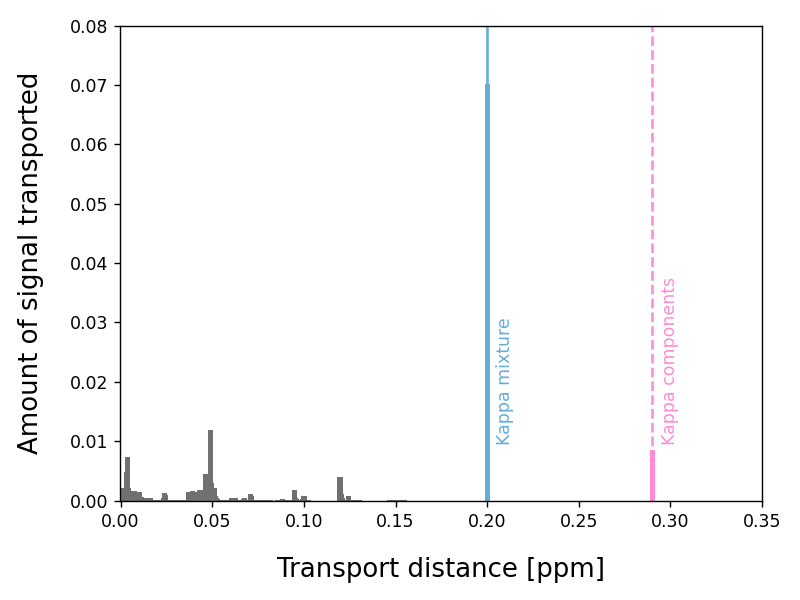

In [43]:
H, bins = distances_signals['Signals'], distances_signals.index

text_position = [0.005, 0.0025, 0.002, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005]
text_position_th = [0.005, -0.005, 0.002, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005]
#xlims = [0.4, 0.1, 0.3, 0.5, 0.3, 0.3, 0.15, 0.15, 0.4]
xlims = [0.25, 0.12, 0.07, 0.3, 0.45, 0.08, 0.14, 0.12, 0.35]
#xlims = [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]
ylims = [0.05, 0.05, 0.08, 0.275, 0.045, 0.04, 0.032, 0.03, 0.08]

fig, ax = plt.subplots()
#ax.set_yscale("log")
ax.set_xlim(-0.0001, xlims[nr_of_experiment-1])
ax.set_ylim(0, ylims[nr_of_experiment-1])

widths = [0.002, 0.001, 0.001, 0.004, 0.003, 0.001, 0.0015, 0.001, 0.003]

histogram = ax.bar(bins[:-2], H.iloc[:-2], width = 0.008*xlims[nr_of_experiment-1], color='#707070')
histogram = ax.bar(bins[-2], H.iloc[-2], width = 0.008*xlims[nr_of_experiment-1], color='#64add9')
histogram = ax.bar(bins[-1], H.iloc[-1], width = 0.008*xlims[nr_of_experiment-1], color='#ff8bd5')

# histogram[-2].set_color('#64add9')
# histogram[-1].set_color('#ff8bd5')

plt.xlabel('Transport distance [ppm]', fontsize=15, labelpad=15)
plt.ylabel('Amount of signal transported', fontsize=15, labelpad=15)

plt.axvline(x=MTD, color='#64add9')
plt.text(MTD + text_position[nr_of_experiment-1], 0.01,'Kappa mixture',rotation=90, color='#64add9')

plt.axvline(x=MTD_th, color='#ff8bd5', linestyle='--')
#plt.text(MTD_th+ text_position_th[nr_of_experiment-1], 0.01,'Kappa components',rotation=90, color='#A35FC1')
plt.text(MTD_th+ text_position_th[nr_of_experiment-1], 0.01,'Kappa components',rotation=90, color='#ff8bd5')

plt.tight_layout()
plt.show()
plt.savefig('distances_histogram_exp_'+str(nr_of_experiment)+'.png', dpi=300)

In [45]:
percent = 0.99
q = H.quantile(q=percent)
print(str(percent*100)+'% of signal is transported on distance smaller than '+str(q)+'.' )

99.0% of signal is transported on distance smaller than 0.00012843583456646147.


In [46]:
(distances_signals.iloc[:-2,:]).sum()

Signals    1.0
dtype: float64

In [49]:
#len(list(mix_without_noise.WSDistanceMoves(components_without_noise)))

279153

In [55]:
#list(mix_without_noise.WSDistanceMoves(components_without_noise))

In [53]:
#len(mix_without_noise.confs)*2

279154